# Tarea 5

## Andrey Arguedas Espinoza

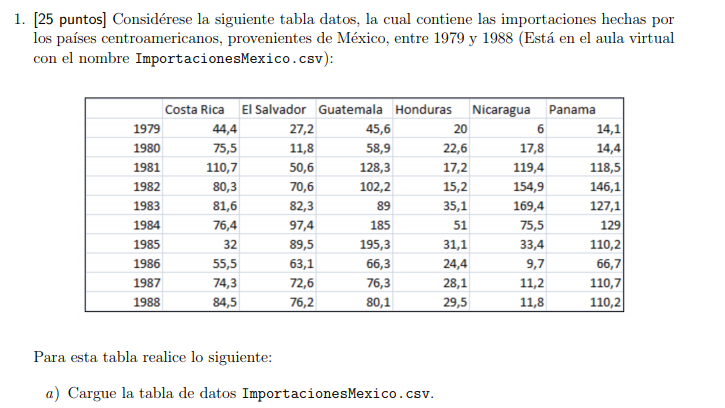

In [1]:
import os
import pandas as pd

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VI Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('ImportacionesMexico.csv',delimiter=';',decimal=",",index_col=0)
print(datos)

      Costa Rica  El Salvador  Guatemala  Honduras  Nicaragua  Panama
1979        44.4         27.2       45.6      20.0        6.0    14.1
1980        75.5         11.8       58.9      22.6       17.8    14.4
1981       110.7         50.6      128.3      17.2      119.4   118.5
1982        80.3         70.6      102.2      15.2      154.9   146.1
1983        81.6         82.3       89.0      35.1      169.4   127.1
1984        76.4         97.4      185.0      51.0       75.5   129.0
1985        32.0         89.5      195.3      31.1       33.4   110.2
1986        55.5         63.1       66.3      24.4        9.7    66.7
1987        74.3         72.6       76.3      28.1       11.2   110.7
1988        84.5         76.2       80.1      29.5       11.8   110.2


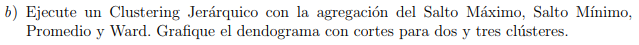

In [2]:
import numpy as np
from   math import pi
from   sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from   sklearn.decomposition import PCA
from   sklearn.datasets import make_blobs
from   sklearn.cluster import KMeans
# Import the dendrogram function and the ward, single, complete, average, linkage and fcluster clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward, single, complete,average,linkage, fcluster
from scipy.spatial.distance import pdist
import pandas as pd

def open_close_plot():
    plt.show()
    plt.close()
    
def bar_plot(centros, labels, cluster = None, var = None):
    from math import ceil, floor
    from seaborn import color_palette
    colores = color_palette()
    minimo = floor(centros.min()) if floor(centros.min()) < 0 else 0
    def inside_plot(valores, labels, titulo):
        plt.barh(range(len(valores)), valores, 1/1.5, color = colores)
        plt.xlim(minimo, ceil(centros.max()))
        plt.title(titulo)
    if var is not None:
        centros = np.array([n[[x in var for x in labels]] for n in centros])
        colores = [colores[x % len(colores)] for x, i in enumerate(labels) if i in var]
        labels = labels[[x in var for x in labels]]
    if cluster is None:
        for i in range(centros.shape[0]):
            plt.subplot(1, centros.shape[0], i + 1)
            inside_plot(centros[i].tolist(), labels, ('Cluster ' + str(i)))
            plt.yticks(range(len(labels)), labels) if i == 0 else plt.yticks([]) 
    else:
        pos = 1
        for i in cluster:
            plt.subplot(1, len(cluster), pos)
            inside_plot(centros[i].tolist(), labels, ('Cluster ' + str(i)))
            plt.yticks(range(len(labels)), labels) if pos == 1 else plt.yticks([]) 
            pos += 1
            
def radar_plot(centros, labels):
    from math import pi
    centros = np.array([((n - min(n)) / (max(n) - min(n)) * 100) if 
                        max(n) != min(n) else (n/n * 50) for n in centros.T])
    angulos = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
    angulos += angulos[:1]
    ax = plt.subplot(111, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angulos[:-1], labels)
    ax.set_rlabel_position(0)
    plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"], 
           color = "grey", size = 8)
    plt.ylim(-10, 100)
    for i in range(centros.shape[1]):
        valores = centros[:, i].tolist()
        valores += valores[:1]
        ax.plot(angulos, valores, linewidth = 1, linestyle = 'solid', 
                label = 'Cluster ' + str(i))
        ax.fill(angulos, valores, alpha = 0.3)
    plt.legend(loc='upper right', bbox_to_anchor = (0.1, 0.1))
    
def graficar_cortes(lim1, lim2):
    ax = plt.gca()
    limites = ax.get_xbound()
    ax.plot(limites, [lim1, lim1], '--', c='k')
    ax.plot(limites, [lim2, lim2], '--', c='k')
    ax.text(limites[1], lim1, ' dos clústeres', va='center', fontdict={'size': 15})
    ax.text(limites[1], lim2, ' tres clústeres', va='center', fontdict={'size': 15})
    plt.xlabel("Orden en el eje X")
    plt.ylabel("Distancia o Agregación")
    open_close_plot()
    
def centroide(num_cluster, datos, clusters):
    ind = clusters == num_cluster
    return(pd.DataFrame(datos[ind].mean()).T)
    
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

In [20]:
import sys

scriptpath = "Utils.py"

# Add the directory containing your module to the Python path (wants absolute paths)
sys.path.append(os.path.abspath(scriptpath))

# Do the import
import Utils

ward_res = ward(datos)         #Ward
single_res = single(datos)     #Salto mínimo
complete_res = complete(datos) #Salto Máximo
average_res = average(datos)   #Promedio

print("=================================\n")
print("==============WARD===============\n")
print(ward_res)

print("=========================================\n")
print("==============SALTO MINIMO===============\n")
print(single_res)

print("=========================================\n")
print("==============SALTO MAXIMO===============\n")
print(complete_res)

print("=========================================\n")
print("================PROMEDIO=================\n")
print(average_res)


==============WARD===============

[[  8.           9.          11.57626883   2.        ]
 [  3.           4.          35.77820566   2.        ]
 [  0.           1.          39.08132546   2.        ]
 [  7.          10.          60.8514311    3.        ]
 [  5.           6.          68.27678961   2.        ]
 [  2.          11.          80.34052527   3.        ]
 [ 12.          13.         154.36398328   5.        ]
 [ 14.          15.         208.97035196   5.        ]
 [ 16.          17.         318.22020678  10.        ]]

==============SALTO MINIMO===============

[[  8.           9.          11.57626883   2.        ]
 [  3.           4.          35.77820566   2.        ]
 [  0.           1.          39.08132546   2.        ]
 [  7.          10.          49.95628089   3.        ]
 [  2.          11.          63.49314924   3.        ]
 [ 12.          13.          68.1198943    5.        ]
 [  5.           6.          68.27678961   2.        ]
 [ 14.          16.          98.8004048


================PROMEDIO=================



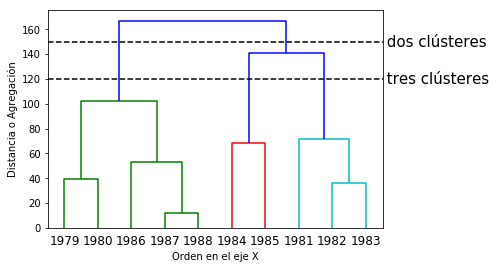

In [8]:
print("=========================================\n")
print("================PROMEDIO=================\n")

dendrogram(average_res,labels= datos.index.tolist())

graficar_cortes(150, 120)



==============SALTO MAXIMO===============



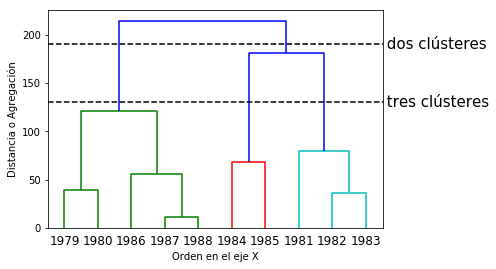

In [9]:
print("=========================================\n")
print("==============SALTO MAXIMO===============\n")

dendrogram(complete_res,labels= datos.index.tolist())

graficar_cortes(190, 130)


==============SALTO MINIMO===============



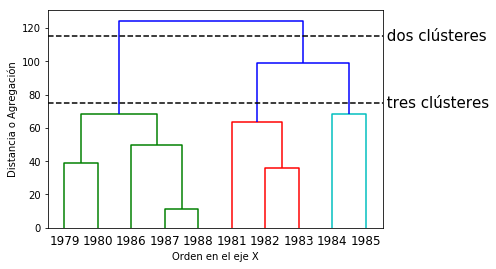

In [10]:
print("=========================================\n")
print("==============SALTO MINIMO===============\n")

dendrogram(single_res,labels= datos.index.tolist())

graficar_cortes(115, 75)


==============WARD===============



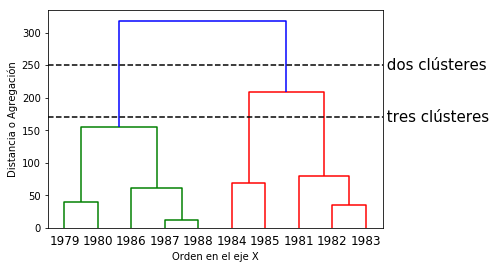

In [11]:
print("=================================\n")
print("==============WARD===============\n")

dendrogram(ward_res,labels= datos.index.tolist())

graficar_cortes(250, 170)

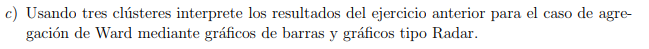

In [19]:
grupos = fcluster(linkage(pdist(datos), method = 'ward', metric='euclidean'), 3, criterion = 'maxclust')
grupos = grupos-1 # Se resta 1 para que los clústeres se enumeren de 0 a (K-1), como usualmente lo hace Python
# El siguiente print es para ver en qué cluster quedó cada individuo
print(grupos)

[0 0 2 2 2 1 1 0 0 0]


In [15]:
centros = np.array(pd.concat([centroide(0, datos, grupos), 
                              centroide(1, datos, grupos),
                              centroide(2, datos, grupos)]))
print(centros)

[[ 66.84        50.18        65.44        24.92        11.3
   63.22      ]
 [ 54.2         93.45       190.15        41.05        54.45
  119.6       ]
 [ 90.86666667  67.83333333 106.5         22.5        147.9
  130.56666667]]


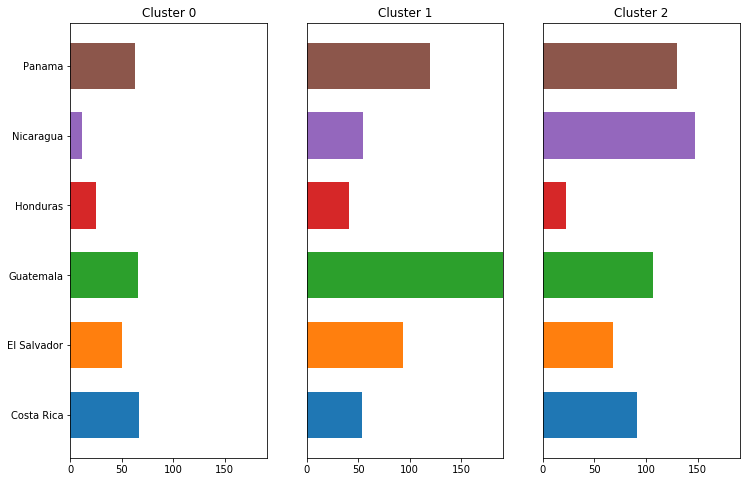

In [16]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, datos.columns)
open_close_plot()

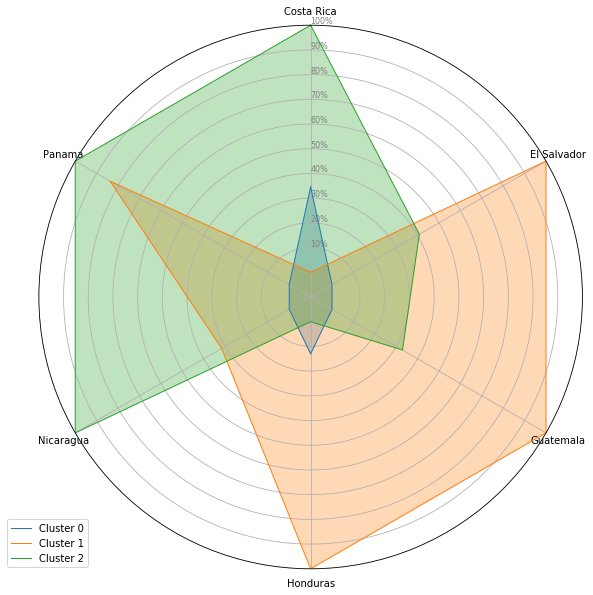

In [17]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, datos.columns)
open_close_plot()

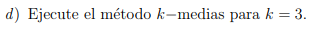

In [21]:
kmedias = KMeans(n_clusters=3)
kmedias.fit(datos)
print(kmedias.predict(datos))

[1 1 2 2 2 0 0 1 1 1]


In [22]:
centros = np.array(kmedias.cluster_centers_)
print(centros) 

[[ 54.2         93.45       190.15        41.05        54.45
  119.6       ]
 [ 66.84        50.18        65.44        24.92        11.3
   63.22      ]
 [ 90.86666667  67.83333333 106.5         22.5        147.9
  130.56666667]]


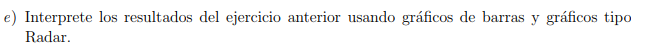

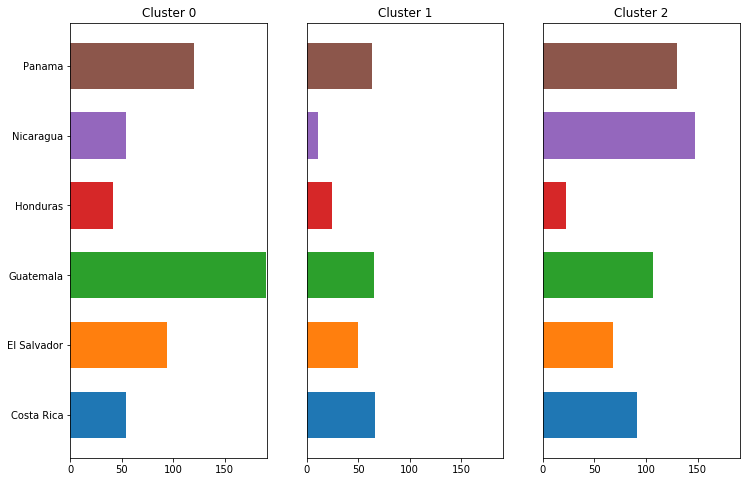

In [23]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, datos.columns)
open_close_plot()

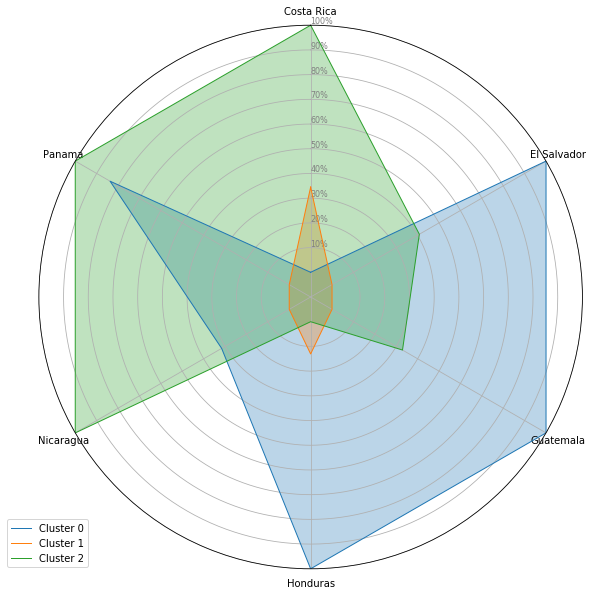

In [24]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, datos.columns)
open_close_plot()

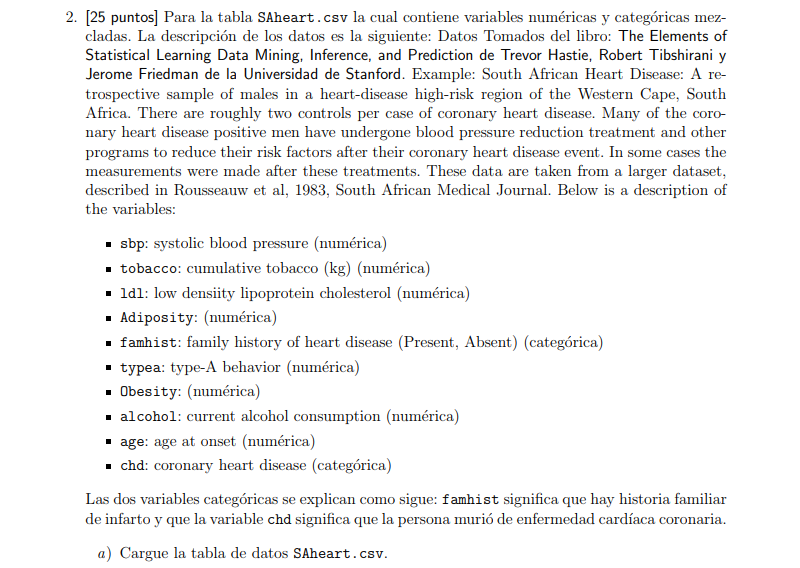

In [30]:
import os
import pandas as pd

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VI Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('SAheart.csv',delimiter=';',decimal=".",index_col=0)
print(datos)

     tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age chd
sbp                                                                      
160    12.00   5.73      23.11  Present     49    25.30    97.20   52  Si
144     0.01   4.41      28.61   Absent     55    28.87     2.06   63  Si
118     0.08   3.48      32.28  Present     52    29.14     3.81   46  No
170     7.50   6.41      38.03  Present     51    31.99    24.26   58  Si
134    13.60   3.50      27.78  Present     60    25.99    57.34   49  Si
132     6.20   6.47      36.21  Present     62    30.77    14.14   45  No
142     4.05   3.38      16.20   Absent     59    20.81     2.62   38  No
114     4.08   4.59      14.60  Present     62    23.11     6.72   58  Si
114     0.00   3.83      19.40  Present     49    24.86     2.49   29  No
132     0.00   5.80      30.96  Present     69    30.11     0.00   53  Si
206     6.00   2.95      32.27   Absent     72    26.81    56.06   60  Si
134    14.10   4.44      22.39  Presen

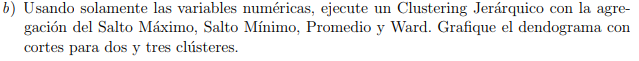

In [31]:
del datos['famhist']
del datos['chd']

ward_res = ward(datos)         #Ward
single_res = single(datos)     #Salto mínimo
complete_res = complete(datos) #Salto Máximo
average_res = average(datos)   #Promedio

print("=================================\n")
print("==============WARD===============\n")
print(ward_res)

print("=========================================\n")
print("==============SALTO MINIMO===============\n")
print(single_res)

print("=========================================\n")
print("==============SALTO MAXIMO===============\n")
print(complete_res)

print("=========================================\n")
print("================PROMEDIO=================\n")
print(average_res)


==============WARD===============

[[162.         164.           1.30709602   2.        ]
 [ 12.         239.           2.06579283   2.        ]
 [156.         462.           2.08803736   3.        ]
 ...
 [917.         919.         329.46173443 318.        ]
 [916.         920.         395.8001323  430.        ]
 [918.         921.         570.98287337 462.        ]]

==============SALTO MINIMO===============

[[162.         164.           1.30709602   2.        ]
 [156.         462.           1.87184401   3.        ]
 [ 12.         239.           2.06579283   2.        ]
 ...
 [ 44.         919.          22.38143874 458.        ]
 [114.         920.          26.32906569 459.        ]
 [913.         921.          29.50889696 462.        ]]

==============SALTO MAXIMO===============

[[162.         164.           1.30709602   2.        ]
 [156.         462.           1.97238434   3.        ]
 [ 12.         239.           2.06579283   2.        ]
 ...
 [914.         917.          89.44


================PROMEDIO=================



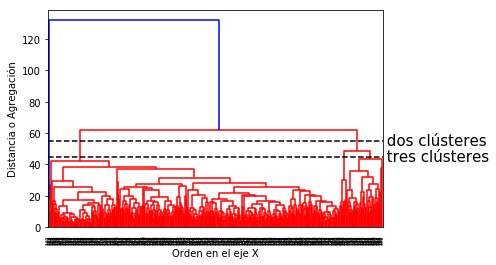


==============SALTO MAXIMO===============



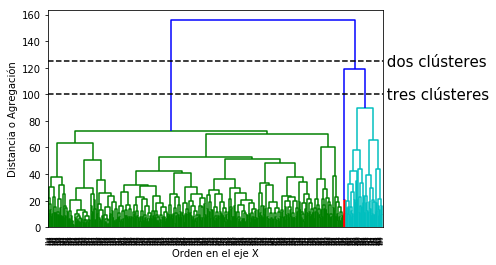


==============WARD===============



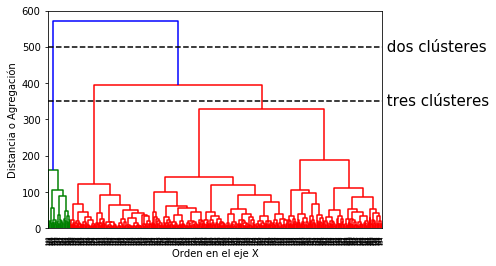

In [27]:
print("=========================================\n")
print("================PROMEDIO=================\n")

dendrogram(average_res,labels= datos.index.tolist())

graficar_cortes(55, 45)

print("=========================================\n")
print("==============SALTO MAXIMO===============\n")

dendrogram(complete_res,labels= datos.index.tolist())

graficar_cortes(125, 100)

print("=================================\n")
print("==============WARD===============\n")

dendrogram(ward_res,labels= datos.index.tolist())

graficar_cortes(500, 350)

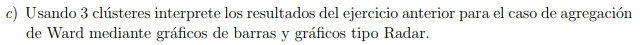

In [32]:
kmedias = KMeans(n_clusters=3)
kmedias.fit(datos)
print(kmedias.predict(datos))

[2 0 0 0 2 0 1 0 1 0 2 1 1 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 2 2 2 1 0 1 0 1 0 0 1 1 2 1 1 1 1 1 1 2 1
 1 1 0 0 0 2 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 2 0 0 0 1 1
 0 1 0 2 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 2 1 0 2 0 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 0 0 1 1 2 2 1 2 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 2
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 2 2 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 2 0 0 1 2 0 0 0 1 1 0 0 2 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 0
 2 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 2 0 1 2 1 1 1 1 0 1 1 1 0 1 0
 1 1 2 0 0 1 0 0 1 0 0 0 2 2 0 2 0 0 2 2 1 1 0 0 2 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 2 0 1 2 0 0 2 2 2 2 0 0 0 0 0 1 0 0 0 0 2 0 0 1 0 1 2 2 0 2 1 1 1 0
 0 2 1 0 2 0 2 0 2 0 0 2 1 1 2 0 0 0 1 2 1 0 0 0 0 1 0 2 2 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 2 1 1 2 0 0 2 0 0 0 0 0 0]


In [33]:
centros = np.array(kmedias.cluster_centers_)
print(centros) 

[[ 4.73282787  5.40155738 29.365      52.36065574 27.14155738 10.05278689
  52.81967213]
 [ 1.05633987  3.87392157 18.50627451 54.16339869 24.13464052  6.95862745
  26.16339869]
 [ 5.58830769  4.29753846 26.79061538 53.4        26.41907692 67.03015385
  44.46153846]]


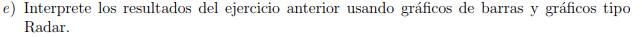

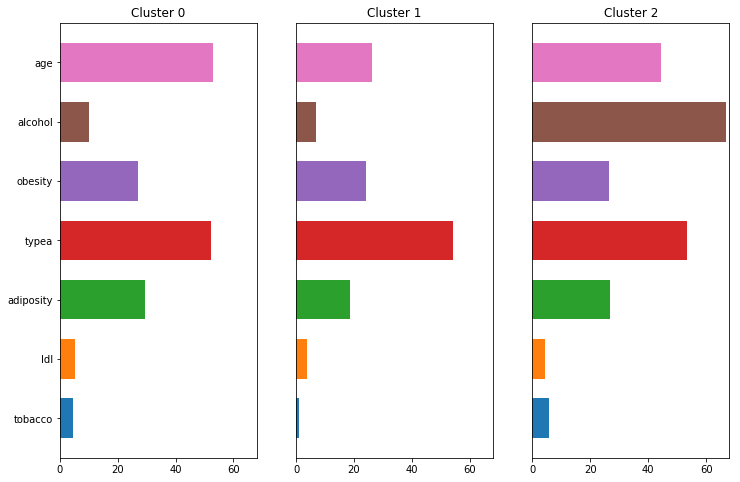

In [34]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, datos.columns)
open_close_plot()

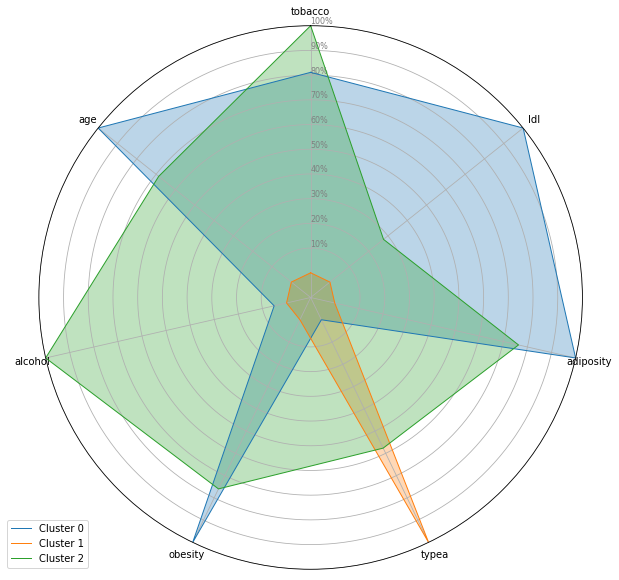

In [35]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, datos.columns)
open_close_plot()

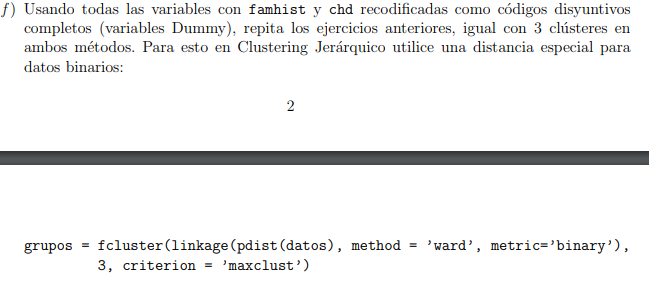

In [38]:
import os
import pandas as pd

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VI Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('SAheart.csv',delimiter=';',decimal=".",index_col=0)
print(datos)

datos["famhist"] = recodificar(datos["famhist"], {"Present": 1,"Absent": 0})
datos["chd"] = recodificar(datos["chd"], {"Si": 1,"No": 0})
print(datos.head())

     tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age chd
sbp                                                                      
160    12.00   5.73      23.11  Present     49    25.30    97.20   52  Si
144     0.01   4.41      28.61   Absent     55    28.87     2.06   63  Si
118     0.08   3.48      32.28  Present     52    29.14     3.81   46  No
170     7.50   6.41      38.03  Present     51    31.99    24.26   58  Si
134    13.60   3.50      27.78  Present     60    25.99    57.34   49  Si
132     6.20   6.47      36.21  Present     62    30.77    14.14   45  No
142     4.05   3.38      16.20   Absent     59    20.81     2.62   38  No
114     4.08   4.59      14.60  Present     62    23.11     6.72   58  Si
114     0.00   3.83      19.40  Present     49    24.86     2.49   29  No
132     0.00   5.80      30.96  Present     69    30.11     0.00   53  Si
206     6.00   2.95      32.27   Absent     72    26.81    56.06   60  Si
134    14.10   4.44      22.39  Presen

In [39]:
datos_dummy = pd.get_dummies(datos)
print(datos_dummy.head())

     tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
sbp                                                                      
160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
134    13.60  3.50      27.78        1     60    25.99    57.34   49    1


In [40]:
grupos = fcluster(linkage(pdist(datos_dummy), method = 'ward', metric='binary'), 3, criterion = 'maxclust')
grupos = grupos-1 # Se resta 1 para que los clústeres se enumeren de 0 a (K-1), como usualmente lo hace Python
# El siguiente print es para ver en qué cluster quedó cada individuo
print(grupos)

[0 2 2 2 0 2 1 2 1 2 0 1 1 1 2 2 2 2 0 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 2 2
 2 1 2 2 1 1 1 1 1 2 1 2 1 2 2 1 0 0 0 1 1 1 2 1 1 2 1 1 0 1 1 1 1 1 1 2 1
 1 1 2 2 2 0 1 2 2 2 1 2 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 1 2 1 1 0 2 2 1 1 1
 2 1 2 0 2 1 2 2 1 2 1 1 2 2 2 1 1 2 2 2 0 1 2 0 2 1 1 1 2 2 1 1 2 1 1 1 2
 1 2 2 2 1 1 0 0 1 0 1 2 1 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 1 1 1 2 2 2 2 2 2
 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 0 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 1 1 1 2 1 2
 2 1 2 2 1 2 2 2 0 2 2 1 0 1 2 2 1 1 2 2 0 2 2 2 2 2 2 2 0 1 2 1 2 2 2 1 2
 2 1 1 2 2 2 1 1 2 1 2 2 2 1 1 2 2 2 1 1 1 1 2 2 1 0 1 1 1 1 2 1 1 1 2 1 2
 1 1 0 2 1 1 2 2 1 2 1 2 0 2 2 2 2 2 0 2 1 1 2 2 0 1 2 2 2 1 2 1 1 2 1 2 2
 2 2 2 0 2 2 0 2 1 0 2 2 0 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 0 2 2 1 1 2 2
 2 0 2 2 0 2 0 2 0 2 2 0 2 1 0 2 2 2 2 2 2 2 2 2 2 1 2 0 0 1 2 2 2 2 2 2 2
 2 1 1 2 2 2 2 2 2 0 2 1 2 0 2 0 2 1 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 1 0 1 1 2 2 1 2 2 2 2 2 2 1]


In [41]:
centros = np.array(pd.concat([centroide(0, datos_dummy, grupos), 
                              centroide(1, datos_dummy, grupos),
                              centroide(2, datos_dummy, grupos)]))
print(centros)

[[ 6.54909091  4.54386364 27.65659091  0.5        53.81818182 26.66204545
  78.14068182 46.5         0.43181818]
 [ 1.59634286  4.09805714 19.64611429  0.28       54.13142857 24.15508571
   4.87634286 29.44571429  0.19428571]
 [ 4.57674897  5.23843621 29.14794239  0.49794239 52.2345679  27.29263374
  14.74469136 51.77777778  0.44032922]]


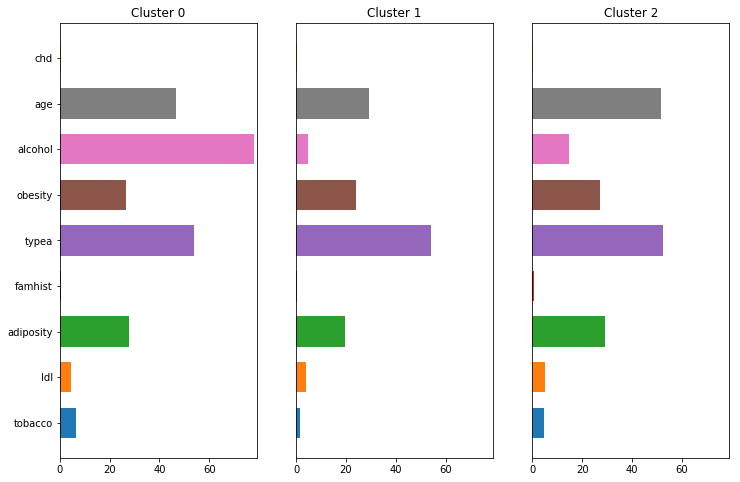

In [42]:
plt.figure(1, figsize = (12, 8))
bar_plot(centros, datos_dummy.columns)
open_close_plot()

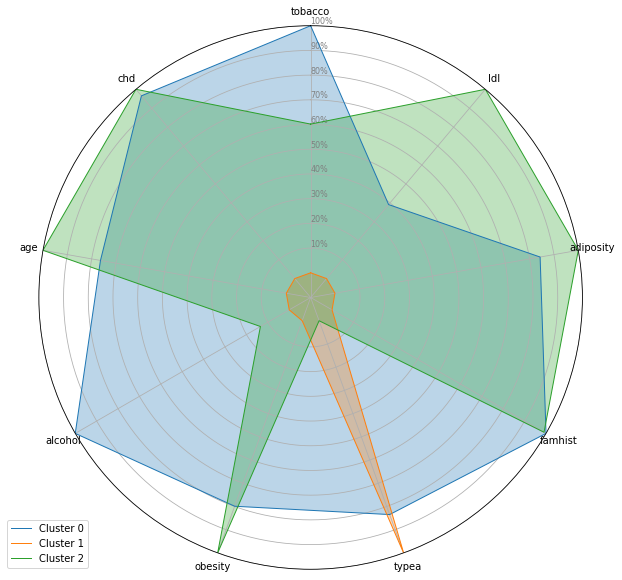

In [43]:
plt.figure(1, figsize = (10, 10))
radar_plot(centros, datos_dummy.columns)
open_close_plot()

[2 1 1 1 2 1 0 1 0 1 2 0 0 0 1 1 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0
 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 2 2 2 0 1 0 1 0 1 1 0 0 2 0 0 0 0 0 0 2 0
 0 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 2 1 1 1 0 0
 1 0 1 2 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 2 0 1 2 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 0 0 2 2 0 2 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 2
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 2 2 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 1 1 0 1 1 1 2 1 1 0 2 1 1 1 0 0 1 1 2 1 1 1 1 1 1 1 2 0 1 1 2 1 1 1 1
 2 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 2 1 0 2 0 0 0 0 1 0 0 0 1 0 1
 0 0 2 1 1 0 1 1 0 1 1 1 2 2 1 2 1 1 2 2 0 0 1 1 2 0 1 1 1 0 1 0 0 1 0 1 1
 1 1 1 2 1 0 2 1 1 2 2 2 2 1 1 1 1 1 0 1 1 1 1 2 1 1 0 1 0 2 2 1 2 0 0 0 1
 1 2 0 1 2 1 2 1 2 1 1 2 0 0 2 1 1 1 0 2 0 1 1 1 1 0 1 2 2 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 2 1 1 2 1 1 1 1 1 1]
[[ 1.05633987  3.87392157 18.50627451  0.26797386 54.16339869 

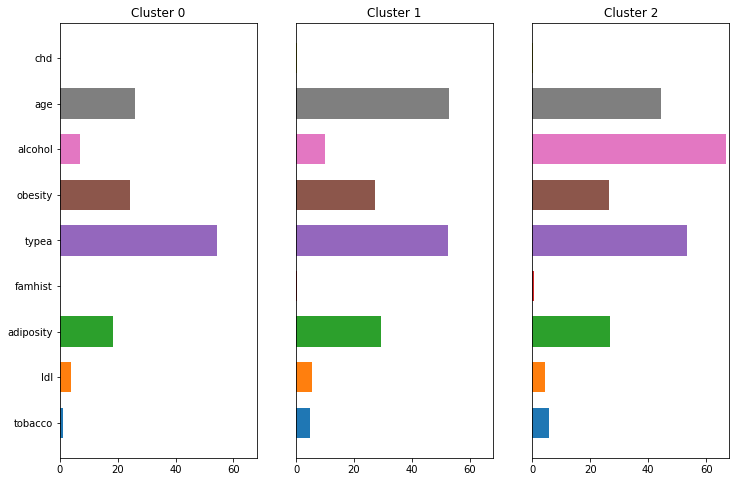

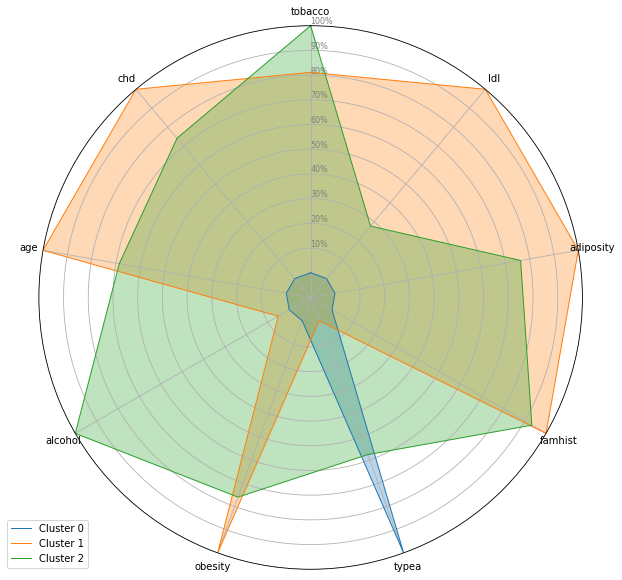

In [44]:
kmedias = KMeans(n_clusters=3)
kmedias.fit(datos_dummy)
print(kmedias.predict(datos_dummy))


centros = np.array(kmedias.cluster_centers_)
print(centros) 


plt.figure(1, figsize = (12, 8))
bar_plot(centros, datos_dummy.columns)
open_close_plot()

plt.figure(1, figsize = (10, 10))
radar_plot(centros, datos_dummy.columns)
open_close_plot()

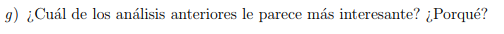

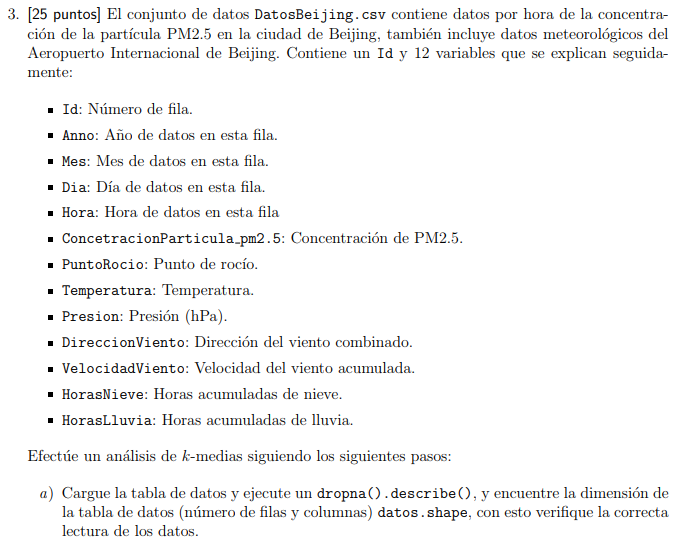

In [4]:
import os
import pandas as pd
import numpy as np

os.chdir("/Users/Andrey/Desktop/Data-Science-Course/VI Lecture")

pd.set_option('display.max_rows', 1000)

datos = pd.read_csv('DatosBeijing.csv',delimiter=',',decimal=".",index_col=0)

print(datos.dropna().describe())

print(datos.shape)

               Anno           Mes           Dia          Hora  \
count  41757.000000  41757.000000  41757.000000  41757.000000   
mean    2012.042771      6.513758     15.685514     11.502311   
std        1.415311      3.454199      8.785539      6.924848   
min     2010.000000      1.000000      1.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.000000   
50%     2012.000000      7.000000     16.000000     12.000000   
75%     2013.000000     10.000000     23.000000     18.000000   
max     2014.000000     12.000000     31.000000     23.000000   

       ConcetracionParticula_pm2.5    PuntoRocio   Temperatura       Presion  \
count                 41757.000000  41757.000000  41757.000000  41757.000000   
mean                     98.613215      1.750174     12.401561   1016.442896   
std                      92.050387     14.433658     12.175215     10.300733   
min                       0.000000    -40.000000    -19.000000    991.000000   
25%           

In [5]:
datos = datos.replace(to_replace='NA', value=np.nan).dropna()

print(datos.shape)

(41757, 12)


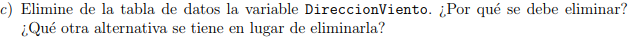

In [6]:
del datos['DireccionViento']

print(datos.shape)

print(datos.head())

""" 
Se debe eliminar ya que es una variable cualitativa y no calzaría en los
metodos a utilizar (K-means y Clusting Jerarquico). La alternativa sería recodificar

"""

(41757, 11)
    Anno  Mes  Dia  Hora  ConcetracionParticula_pm2.5  PuntoRocio  \
ID                                                                  
25  2010    1    2     0                        129.0         -16   
26  2010    1    2     1                        148.0         -15   
27  2010    1    2     2                        159.0         -11   
28  2010    1    2     3                        181.0          -7   
29  2010    1    2     4                        138.0          -7   

    Temperatura  Presion  VelocidadViento  HorasNieve  HorasLluvia  
ID                                                                  
25         -4.0   1020.0             1.79           0            0  
26         -4.0   1020.0             2.68           0            0  
27         -5.0   1021.0             3.57           0            0  
28         -5.0   1022.0             5.36           1            0  
29         -5.0   1022.0             6.25           2            0  


' \nSe debe eliminar ya que es una variable cualitativa y no calzaría en los\nmetodos a utilizar (K-means y Clusting Jerarquico). La alternativa sería recodificar\n\n'

### Se debe eliminar ya que es una variable cualitativa y no calzaría en los metodos a utilizar (K-means y Clusting Jerarquico). La alternativa sería recodificar.

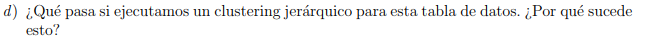

### Si se ejecuta clustring jerarquico el compilador "crasheara" debido a que son muchos datos para utilizar este metodo

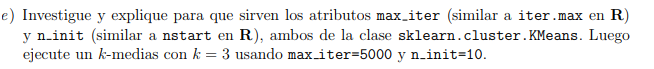

In [7]:
kmeans = KMeans(n_clusters=3,n_init=10,max_iter=500)

kmeans.fit(datos)

print(kmeans.predict(datos))


centros = np.array(kmeans.cluster_centers_)
print(centros) 

[1 1 0 ... 2 2 2]
[[ 2.01196812e+03  6.52000000e+00  1.68747059e+01  1.12242353e+01
   2.45662000e+02  4.41447059e+00  9.90070588e+00  1.01627182e+03
   8.14439529e+00  6.77647059e-02  6.83529412e-02]
 [ 2.01209415e+03  6.46634741e+00  1.53963709e+01  1.15230323e+01
   6.43198137e+01  2.37617279e+00  1.37866171e+01  1.01584713e+03
   1.47403339e+01  5.31013813e-02  2.31365650e-01]
 [ 2.01167474e+03  7.06130418e+00  1.52042171e+01  1.21768840e+01
   2.15946896e+01 -1.45958610e+01  4.10074190e+00  1.02415150e+03
   1.85438157e+02  4.09996095e-02  1.77274502e-01]]
